# Correlation

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Converting Binary Object Values to Integer Values

In [5]:
replacement = {
    "yes":1,
    "no":0
}
newstudent_por = student_por['schoolsup'].replace(replacement,regex = True)
student_por['schoolsup'] = newstudent_por
newstudent_por = student_por['famsup'].replace(replacement,regex = True)
student_por['famsup'] = newstudent_por
newstudent_por = student_por['paid'].replace(replacement,regex = True)
student_por['paid'] = newstudent_por
newstudent_por = student_por['activities'].replace(replacement,regex = True)
student_por['activities'] = newstudent_por
newstudent_por = student_por['nursery'].replace(replacement,regex = True)
student_por['nursery'] = newstudent_por
newstudent_por = student_por['higher'].replace(replacement,regex = True)
student_por['higher'] = newstudent_por
newstudent_por = student_por['internet'].replace(replacement,regex = True)
student_por['internet'] = newstudent_por
newstudent_por = student_por['romantic'].replace(replacement,regex = True)
student_por['romantic'] = newstudent_por
print(student_por)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc  health

In [6]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

# Spearman Correlation

<AxesSubplot:>

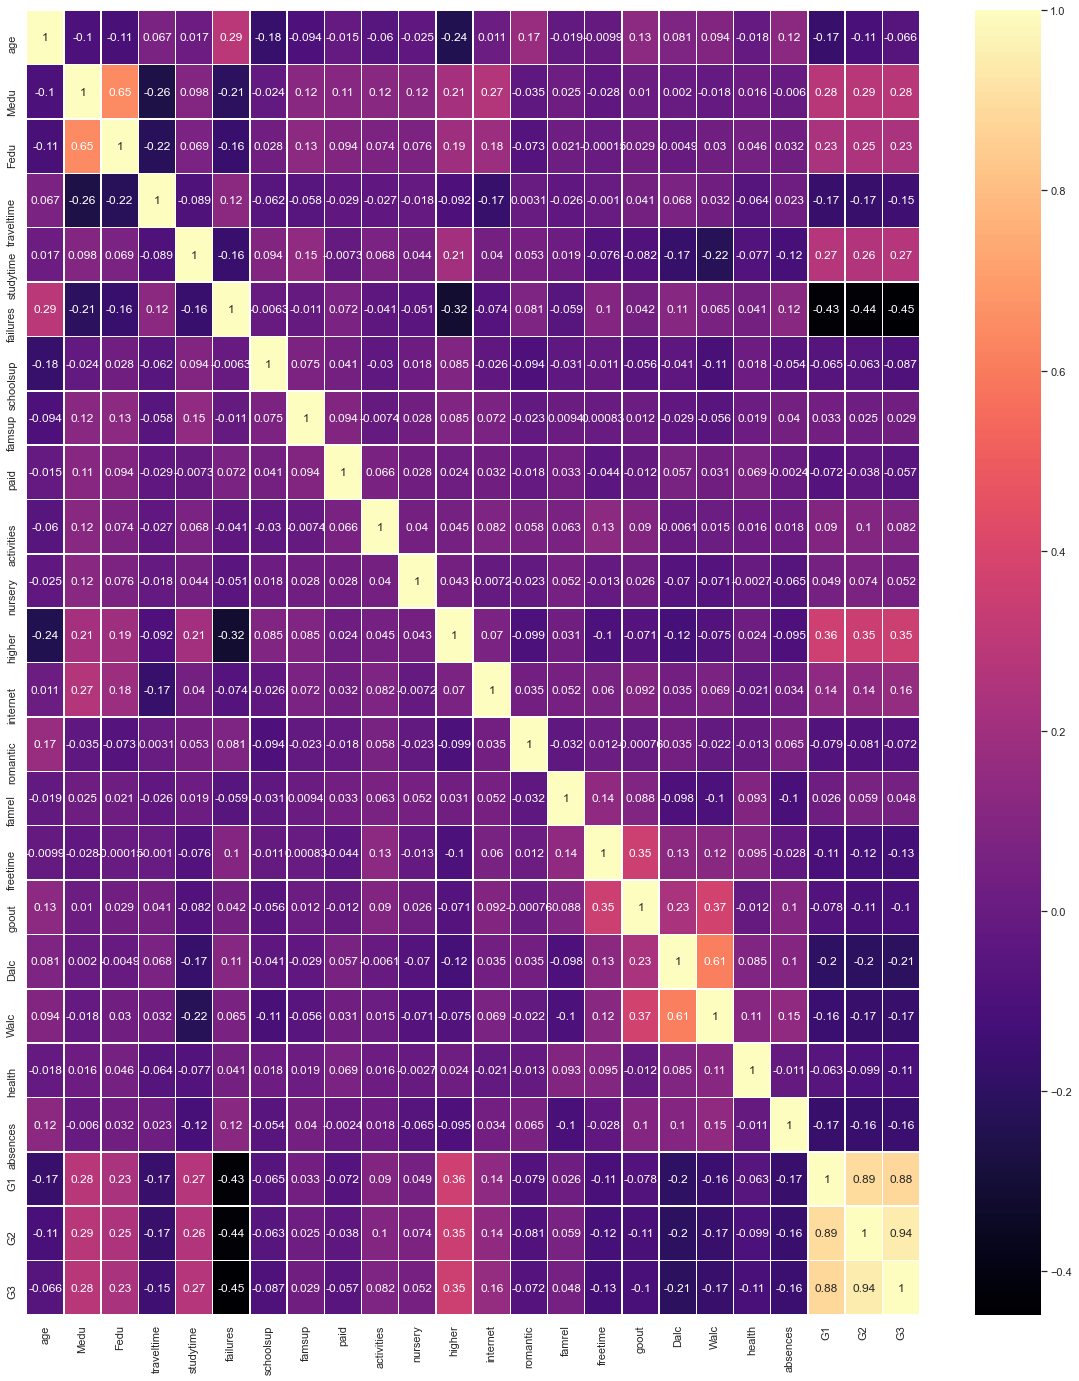

In [7]:
student_corr = student_por.corr(method="spearman")
plt.figure(figsize=(20,24))
sb.set(font_scale=1)
sb.heatmap(student_corr,annot=True,linecolor='white',linewidths=0.5,cmap='magma')

In [8]:
student_corr[student_corr<1].unstack().transpose().sort_values(ascending = False).drop_duplicates()

G3        G2        0.944451
G1        G2        0.893065
          G3        0.883288
Medu      Fedu      0.647194
Walc      Dalc      0.613056
                      ...   
failures  higher   -0.315321
          G1       -0.432432
          G2       -0.435741
          G3       -0.448360
age       age            NaN
Length: 277, dtype: float64

### Filter out the other columns

<AxesSubplot:title={'center':'Spearman'}>

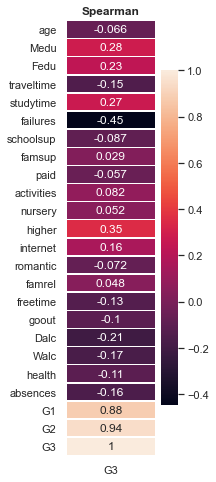

In [9]:
columns = ['G3']
mystudent_corr = student_corr.copy()
mask = mystudent_corr.columns.isin(columns)
mystudent_corr = mystudent_corr.loc[:,mask]
arr = student_corr.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,8))
plt.title('Spearman',fontweight="bold")
sb.heatmap(mystudent_corr, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)

<AxesSubplot:title={'center':'Spearman'}>

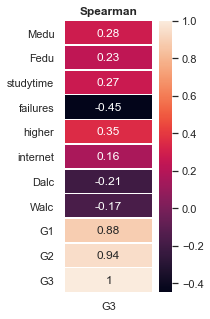

In [10]:
columns = ['G3']
mystudent_corr = student_corr.copy()
mystudent_corr1 = mystudent_corr[['Medu','studytime','failures','higher','internet','Dalc','Walc','G1','G2','G3']]
mystudent_corr1 = mystudent_corr1.drop(mystudent_corr1.index[[0,3,6,7,8,9,10,13,14,15,16,19,20]])
mask = mystudent_corr1.columns.isin(columns)
mystudent_corr1 = mystudent_corr1.loc[:,mask]
arr = mystudent_corr1.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,5))
plt.title('Spearman',fontweight="bold")
mystudent_corr1
sb.heatmap(mystudent_corr1, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)

# Point Biserial Correlation

In [11]:
binary = student_por.select_dtypes(include=['int64','float64'])
newstudent_binary = binary.drop(columns=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2'])
newstudent_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   649 non-null    int64
 1   famsup      649 non-null    int64
 2   paid        649 non-null    int64
 3   activities  649 non-null    int64
 4   nursery     649 non-null    int64
 5   higher      649 non-null    int64
 6   internet    649 non-null    int64
 7   romantic    649 non-null    int64
 8   G3          649 non-null    int64
dtypes: int64(9)
memory usage: 45.8 KB


In [12]:
from scipy.stats import pointbiserialr

In [13]:
name = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
value = []
pbc = pointbiserialr(newstudent_binary['schoolsup'],newstudent_binary['G3'])[0]
value.append(pbc)
print('schoolsup')
print(pbc)
pbc = pointbiserialr(newstudent_binary['famsup'],newstudent_binary['G3'])[0]
value.append(pbc)
print('famsup')
print(pbc)
pbc = pointbiserialr(newstudent_binary['paid'],newstudent_binary['G3'])[0]
value.append(pbc)
print('paid')
print(pbc)
pbc = pointbiserialr(newstudent_binary['activities'],newstudent_binary['G3'])[0]
value.append(pbc)
print('activities')
print(pbc)
pbc = pointbiserialr(newstudent_binary['nursery'],newstudent_binary['G3'])[0]
value.append(pbc)
print('nursery')
print(pbc)
pbc = pointbiserialr(newstudent_binary['higher'],newstudent_binary['G3'])[0]
value.append(pbc)
print('higher')
print(pbc)
pbc = pointbiserialr(newstudent_binary['internet'],newstudent_binary['G3'])[0]
value.append(pbc)
print('internet')
print(pbc)
pbc = pointbiserialr(newstudent_binary['romantic'],newstudent_binary['G3'])[0]
value.append(pbc)
print('romantic')
print(pbc)
print(name)
print(value)
pbcdf = pd.DataFrame(index = name)
#index={0:"schoolsup", 1:"famsup",2:"paid",3:"activities",4:"nursery",5:"higher",6:"internet",7:"romantic"})
pbcdf['Name'] = name
pbcdf.set_index('Name')
pbcdf['G3'] = value
print(pbcdf)

schoolsup
-0.06640474759529723
famsup
0.05920555554578778
paid
-0.05489790782328947
activities
0.059791450427086584
nursery
0.028752359319059832
higher
0.33217159086736114
internet
0.15002485385078754
romantic
-0.09058288359599931
['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
[-0.06640474759529723, 0.05920555554578778, -0.05489790782328947, 0.059791450427086584, 0.028752359319059832, 0.33217159086736114, 0.15002485385078754, -0.09058288359599931]
                  Name        G3
schoolsup    schoolsup -0.066405
famsup          famsup  0.059206
paid              paid -0.054898
activities  activities  0.059791
nursery        nursery  0.028752
higher          higher  0.332172
internet      internet  0.150025
romantic      romantic -0.090583


<AxesSubplot:title={'center':'Point Biserial'}>

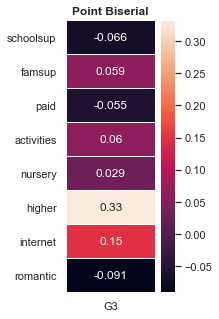

In [14]:
columns = ['G3']
name = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
pbcdf_corr = pbcdf.copy()
mask = pbcdf.columns.isin(columns)
pbcdf_corr = pbcdf_corr.loc[:,mask]
arr = pbcdf_corr.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,5))
plt.title('Point Biserial',fontweight="bold")
sb.heatmap(pbcdf_corr, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)

<AxesSubplot:title={'center':'Point Biserial'}>

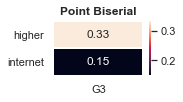

In [15]:
columns = ['G3']
name = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
pbcdf_corr = pbcdf.copy()
pbcdf_corr1 = pbcdf_corr
#pbcdf_corr1
pbcdf_corr1 = pbcdf_corr1.drop(["schoolsup","famsup","paid","activities","nursery","romantic"])
#pbcdf_corr1.drop(pbcdf_corr1.index[[0,1,2,3,4,7]])

mask = pbcdf_corr1.columns.isin(columns)
pbcdf_corr1 = pbcdf_corr1.loc[:,mask]
arr = pbcdf_corr1.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,1))
plt.title('Point Biserial',fontweight="bold")
sb.heatmap(pbcdf_corr1, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)

# Pearson Correlation

<AxesSubplot:>

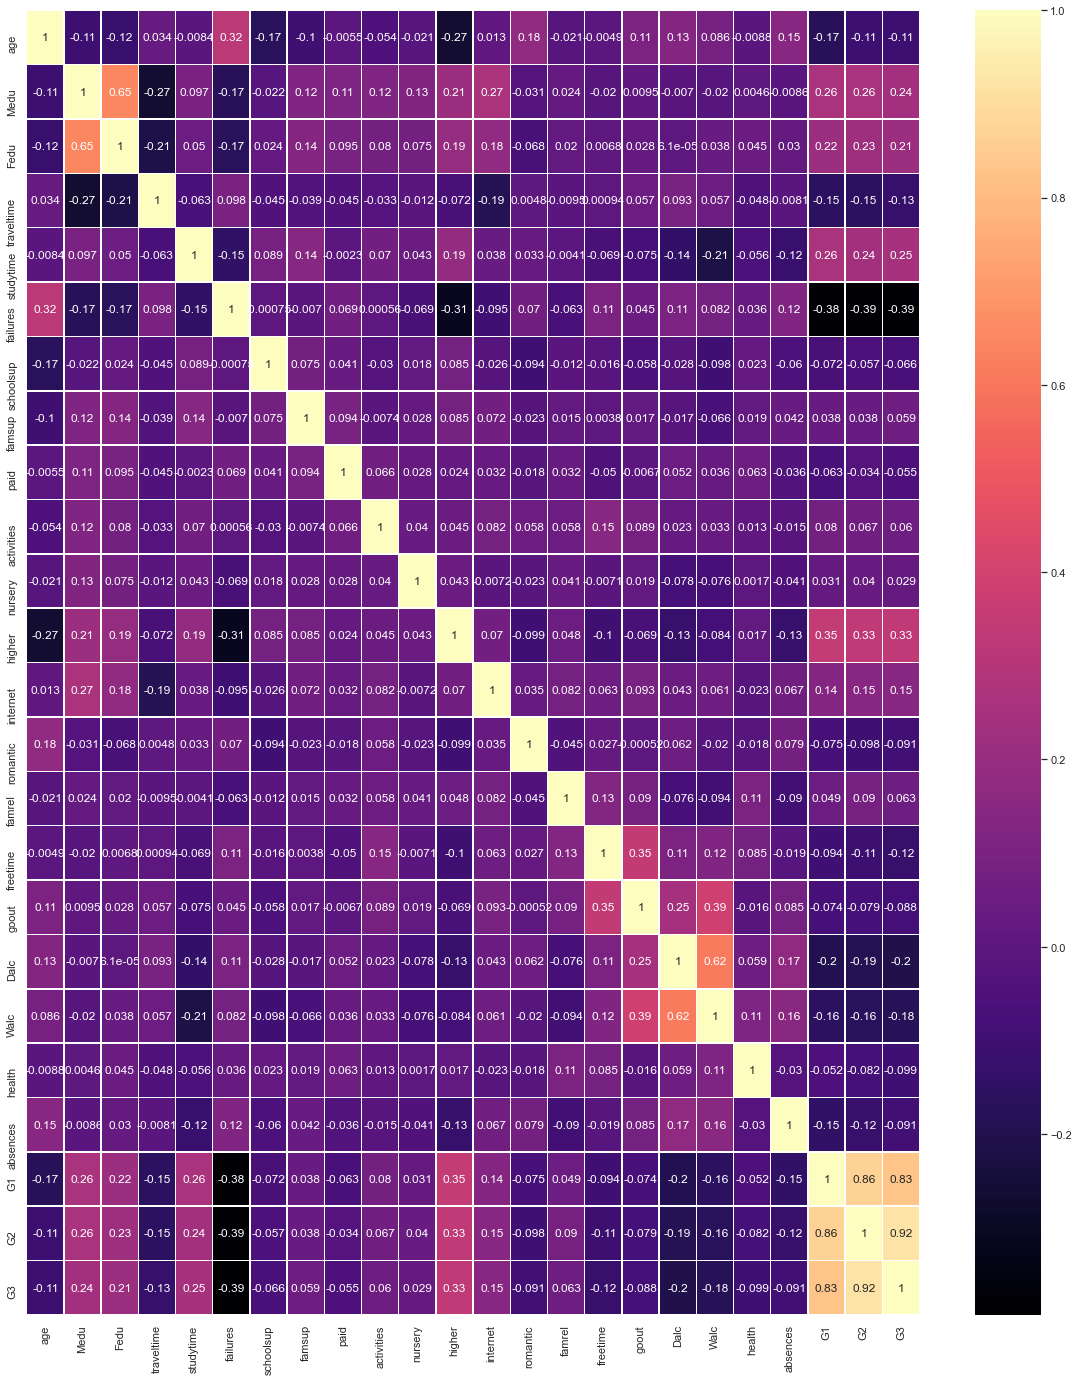

In [16]:
student_corr_pearson = student_por.corr(method="pearson")
plt.figure(figsize=(20,24))
sb.set(font_scale=1)
sb.heatmap(student_corr_pearson,annot=True,linecolor='white',linewidths=0.5,cmap='magma')

### Filter out the other columns

<AxesSubplot:title={'center':'Pearson'}>

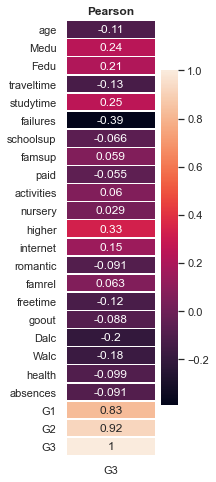

In [17]:
columns = ['G3']
mystudent_corr_pearson = student_corr_pearson.copy()
mask = mystudent_corr_pearson.columns.isin(columns)
mystudent_corr_pearson = mystudent_corr_pearson.loc[:,mask]
arr = student_corr_pearson.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,8))
plt.title('Pearson',fontweight="bold")
sb.heatmap(mystudent_corr_pearson, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)

<AxesSubplot:title={'center':'Pearson'}>

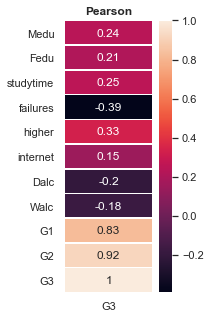

In [18]:
columns = ['G3']
mystudent_corr_pearson = student_corr_pearson.copy()
mystudent_pearson1 = mystudent_corr_pearson[['Medu','studytime','failures','higher','internet','Dalc','Walc','G1','G2','G3']]
mystudent_pearson1 = mystudent_pearson1.drop(mystudent_pearson1.index[[0,3,6,7,8,9,10,13,14,15,16,19,20]])
mystudent_pearson1
mask = mystudent_pearson1.columns.isin(columns)
mystudent_pearson1 = mystudent_pearson1.loc[:,mask]
arr = mystudent_pearson1.values
vmin,vmax = arr.min(), arr.max()
plt.figure(figsize = (2,5))
plt.title('Pearson',fontweight="bold")
mystudent_corr1
sb.heatmap(mystudent_pearson1, annot=True,vmin=vmin, vmax=vmax, linewidth = 0.5)